<a href="https://colab.research.google.com/github/GuntherFrager/fuzzy-carnival/blob/main/3m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import itertools
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [ ]:
dfaux = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notebookfinal/usdt-btc-3m.csv', index_col='Time')

In [ ]:
dfaux = dfaux.drop('Close Time', axis = 1)

In [ ]:
cols = dfaux.columns

In [ ]:
cols

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
def nuevodataset(velas):
  global df
  df = dfaux.copy(deep = True)

  for i in range(velas+1):
    for col in cols:
      aux = str(col)+str((velas-i)-1)
      df[aux] = df[str(col)].shift((velas-i)-1)
  df = df.drop(cols,axis = 1)

In [ ]:
nuevodataset(14)

In [ ]:
#dfaux = dfaux.drop(['Open-1','High-1','Low-1','Close-1','Volume-1'], axis=1)

In [ ]:
df.columns

Index(['Open13', 'High13', 'Low13', 'Close13', 'Volume13', 'Open12', 'High12',
       'Low12', 'Close12', 'Volume12', 'Open11', 'High11', 'Low11', 'Close11',
       'Volume11', 'Open10', 'High10', 'Low10', 'Close10', 'Volume10', 'Open9',
       'High9', 'Low9', 'Close9', 'Volume9', 'Open8', 'High8', 'Low8',
       'Close8', 'Volume8', 'Open7', 'High7', 'Low7', 'Close7', 'Volume7',
       'Open6', 'High6', 'Low6', 'Close6', 'Volume6', 'Open5', 'High5', 'Low5',
       'Close5', 'Volume5', 'Open4', 'High4', 'Low4', 'Close4', 'Volume4',
       'Open3', 'High3', 'Low3', 'Close3', 'Volume3', 'Open2', 'High2', 'Low2',
       'Close2', 'Volume2', 'Open1', 'High1', 'Low1', 'Close1', 'Volume1',
       'Open0', 'High0', 'Low0', 'Close0', 'Volume0', 'Open-1', 'High-1',
       'Low-1', 'Close-1', 'Volume-1'],
      dtype='object')

In [ ]:
valores = ['Close13','Close12','Close11','Close10','Close9','Close8','Close7','Close6','Close5','Close4','Close3','Close2','Close1','Close0']

In [ ]:
# Función para calcular el RSI
def calculate_rsi_from_values(values):
    changes = np.diff(values)
    gain = np.sum(changes[changes > 0])
    loss = -np.sum(changes[changes < 0])

    if loss == 0:  # Manejo de división por cero
        return 100
    else:
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

# Cargar el dataset
# Supongamos que tienes un DataFrame llamado 'data' con las columnas Close0, Close1,..., Close13
# Reemplace esto con la forma en que cargas tus datos
data = df[valores[-2:-1]].copy(deep= True)

# Calcular el RSI
data['RSI'] = data.apply(lambda row: calculate_rsi_from_values(row), axis=1)

In [ ]:
# Función para calcular el RSI
data['MM'] = data.iloc[:, :14].sum(axis=1) / 14


# Calcular el RSI
#data['MM'] = data.apply(lambda row: calculate_mm(row), axis=1)

In [ ]:
df['MM'] = data['MM']

In [ ]:
df['RSI-2'] = data['RSI']

In [ ]:
df['RSI-14'] =  data['RSI']

In [ ]:
df.RSI.describe()

count    973399.000000
mean         50.362018
std          15.757445
min           0.000000
25%          39.386083
50%          50.350825
75%          61.319698
max         100.000000
Name: RSI, dtype: float64

In [ ]:
df['NCV'] =  df['Close-1'] - df['Open-1']

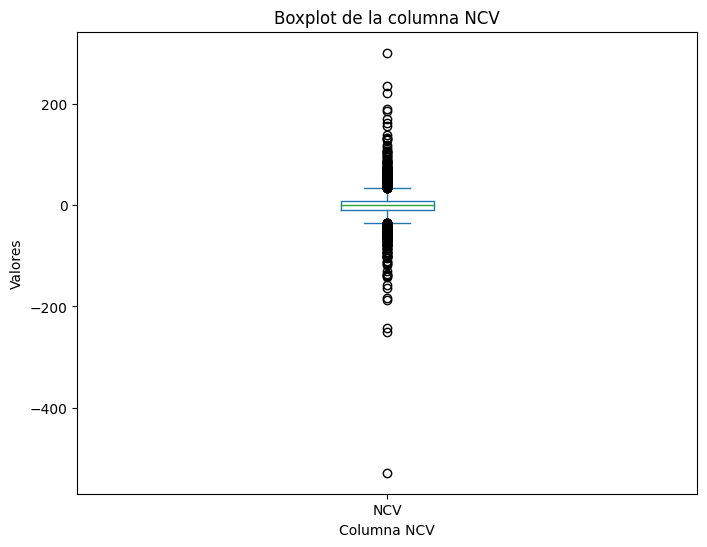

In [ ]:
columna_seleccionada = 'NCV'

# Crear el boxplot para la columna seleccionada
plt.figure(figsize=(8, 6))
df.NCV[-5000:].plot(kind='box')

# Agregar título y etiquetas a los ejes
plt.title('Boxplot de la columna {}'.format(columna_seleccionada))
plt.xlabel('Columna {}'.format(columna_seleccionada))
plt.ylabel('Valores')

# Mostrar el boxplot
plt.show()

In [ ]:
df['Action'] = df.apply(lambda x: 1 if x['Close0'] + 200 <= x['MM'] else -1 if x['Close0'] - 200 >= x['MM']  else 0, axis=1)

In [ ]:
df['Action'] = df.apply(lambda x: 1 if x['RSI-2'] <= 15 and x['RSI-14'] >= 50 else -1 if x['RSI-2'] >= 85 and x['RSI-14'] <=50 else 0, axis=1)

In [ ]:
df['Action'] = df.apply(lambda x: 1 if x['NCV'] >= 16 else -1 if x['NCV'] <= -16 else 0, axis=1)

In [ ]:
df.head()

,Open13,High13,Low13,Close13,Volume13,Open12,High12,Low12,Close12,Volume12,...,Close0,Volume0,Open-1,High-1,Low-1,Close-1,Volume-1,RSI,NCV,Action
Time,,,,,,,,,,,,,,,,,,,,,
2017-08-17 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4280.56,2.036257,4261.48,4261.48,4261.48,4261.48,0.152804,100.0,0.0,-1
2017-08-17 01:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.152804,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.0,1
2017-08-17 01:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.000000,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.0,1
2017-08-17 01:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.000000,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.0,1
2017-08-17 01:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.000000,4261.48,4264.88,4261.48,4264.88,0.075455,0.0,3.4,1


In [ ]:
df.Action.value_counts()

Action
 0    495330
-1    478069
Name: count, dtype: int64

### Visualizaciones

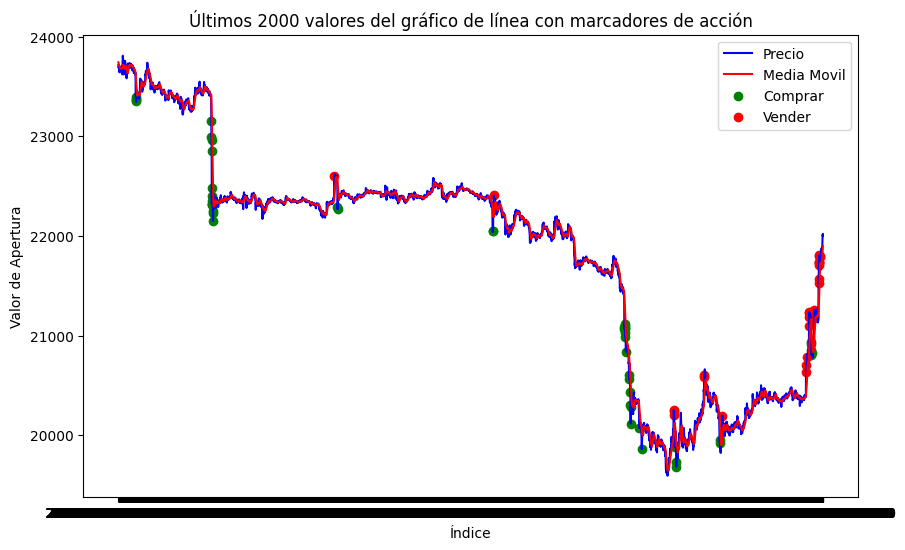

In [ ]:
# Seleccionar los últimos 2000 valores de las columnas 'Open' y 'Action'
df_last_2000 = df.tail(5500)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la línea de la columna 'Open'
plt.plot(df_last_2000['Close0'], color='blue', label='Precio')
plt.plot(df_last_2000['MM'], color='red', label='Media Movil')
# Marcar puntos verdes donde 'Action' es igual a 1
plt.scatter(df_last_2000.index[df_last_2000['Action'] == 1], df_last_2000['Close0'][df_last_2000['Action'] == 1], color='green', label='Comprar')

# Marcar puntos rojos donde 'Action' es igual a -1
plt.scatter(df_last_2000.index[df_last_2000['Action'] == -1], df_last_2000['Close0'][df_last_2000['Action'] == -1], color='red', label='Vender')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor de Apertura')
plt.title('Últimos 2000 valores del gráfico de línea con marcadores de acción')
plt.legend()

# Mostrar el gráfico
plt.grid(False)
plt.show()

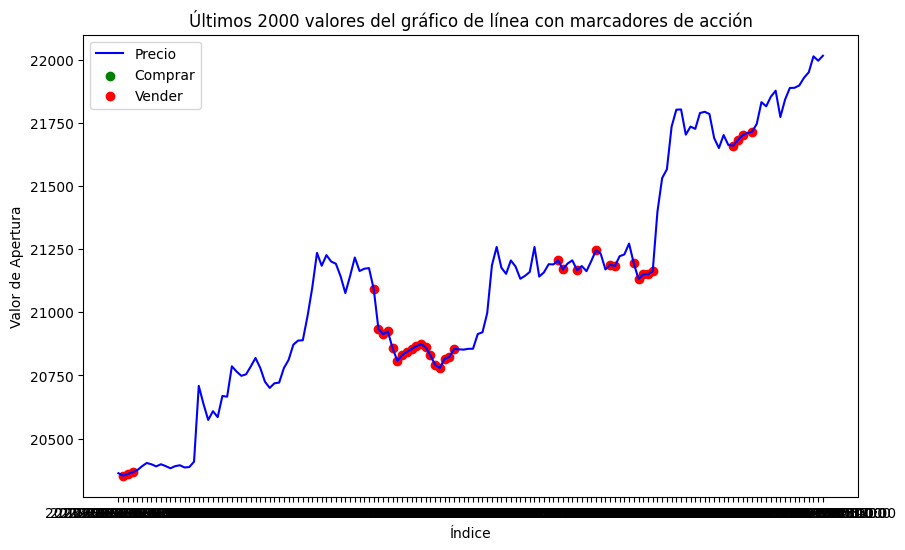

In [ ]:
# Seleccionar los últimos 2000 valores de las columnas 'Open' y 'Action'
df_last_2000 = df.tail(150)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la línea de la columna 'Open'
plt.plot(df_last_2000['Close0'], color='blue', label='Precio')

# Marcar puntos verdes donde 'Action' es igual a 1
plt.scatter(df_last_2000.index[df_last_2000['Action'] == 1], df_last_2000['Close0'][df_last_2000['Action'] == 1], color='green', label='Comprar')

# Marcar puntos rojos donde 'Action' es igual a -1
plt.scatter(df_last_2000.index[df_last_2000['Action'] == -1], df_last_2000['Close0'][df_last_2000['Action'] == -1], color='red', label='Vender')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor de Apertura')
plt.title('Últimos 2000 valores del gráfico de línea con marcadores de acción')
plt.legend()

# Mostrar el gráfico
plt.grid(False)
plt.show()

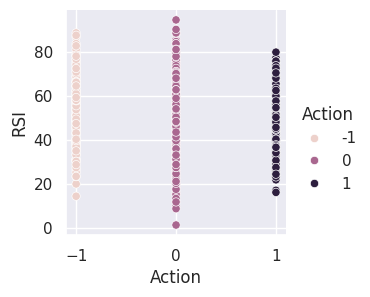

In [ ]:
sns.set()

sns.pairplot(df.sample(900),
             x_vars=['Action'],
             y_vars=['RSI'],
             hue= 'Action',
             height= 3)

plt.show()

### Construimos el modelo. Preparacion de datos

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
def normalizar(dataframe, dia):
  i = dia * 1440
  df_final_dia1 = dataframe[:][i:i+1440]
  df_final_dia2 = dataframe[:][i+1440:i+2880]

  nuevo_min = 0.25
  nuevo_max = 0.75

  #cols = df.drop(['Comprar','Nada','Vender'],axis=1).columns
  cols = dataframe.columns.drop('Action')

  for col in cols:
    try:
      df_final_dia2[col] = ((df_final_dia2[col] - df_final_dia1[col].min()) / (df_final_dia1[col].max() - df_final_dia1[col].min())) * (nuevo_max - nuevo_min) + nuevo_min
    except TypeError:
      continue


  global df_final
  global df_normal
  df_normal = df_final_dia2
  df_final = dataframe[:][i:i+1440]

  print('df_final y df_normal generados')


In [ ]:
dfaux = df

In [ ]:
df.head()

,Open13,High13,Low13,Close13,Volume13,Open12,High12,Low12,Close12,Volume12,...,Close0,Volume0,Open-1,High-1,Low-1,Close-1,Volume-1,RSI,NCV,Action
Time,,,,,,,,,,,,,,,,,,,,,
2017-08-17 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4280.56,2.036257,4261.48,4261.48,4261.48,4261.48,0.152804,100.0,0.0,1
2017-08-17 01:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.152804,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.0,1
2017-08-17 01:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.000000,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.0,1
2017-08-17 01:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.000000,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.0,1
2017-08-17 01:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4261.48,0.000000,4261.48,4264.88,4261.48,4264.88,0.075455,0.0,3.4,1


In [ ]:
df = df.dropna()

In [ ]:
labels = ['RSI']
target = ['Action']
X = df[labels]
#X = df_normal[labels].to_numpy()
y = df[target]


X_train = X[:int(len(X)*0.8)]
X_test  = X[int(len(X)*0.8):]
y_train = y[:int(len(y)*0.8)]
y_test  = y[int(len(y)*0.8):]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(778708, 1)
(194677, 1)
(778708, 1)
(194677, 1)


In [ ]:
X_train[0:1]

,RSI
Time,
2017-08-17 01:39:00,64.646763


In [ ]:
y_train[0:1]

,Action
Time,
2017-08-17 01:39:00,1


In [ ]:
X_test[0:1]

,RSI
Time,
2022-01-31 07:09:00,61.532085


In [ ]:
y_test[0:1]

,Action
Time,
2022-01-31 07:09:00,0


### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer, recall_score

In [ ]:
# Inicializar el clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)

In [ ]:
df.columns

Index(['Open13', 'High13', 'Low13', 'Close13', 'Volume13', 'Open12', 'High12',
       'Low12', 'Close12', 'Volume12', 'Open11', 'High11', 'Low11', 'Close11',
       'Volume11', 'Open10', 'High10', 'Low10', 'Close10', 'Volume10', 'Open9',
       'High9', 'Low9', 'Close9', 'Volume9', 'Open8', 'High8', 'Low8',
       'Close8', 'Volume8', 'Open7', 'High7', 'Low7', 'Close7', 'Volume7',
       'Open6', 'High6', 'Low6', 'Close6', 'Volume6', 'Open5', 'High5', 'Low5',
       'Close5', 'Volume5', 'Open4', 'High4', 'Low4', 'Close4', 'Volume4',
       'Open3', 'High3', 'Low3', 'Close3', 'Volume3', 'Open2', 'High2', 'Low2',
       'Close2', 'Volume2', 'Open1', 'High1', 'Low1', 'Close1', 'Volume1',
       'Open0', 'High0', 'Low0', 'Close0', 'Volume0', 'Open-1', 'High-1',
       'Low-1', 'Close-1', 'Volume-1', 'RSI', 'NCV', 'Action'],
      dtype='object')

In [ ]:
for i in range(10):
  first_row = i*480
  last_row = (i+1) * 480
  df_for_train = df[first_row:last_row]

  labels = ['RSI',
            'Close13',
            'Close12',
            'Close11',
            'Close10',
            'Close9',
            'Close8',
            'Close7',
            'Close6',
            'Close5',
            'Close4',
            'Close3',
            'Close2',
            'Close1',
            'Close0',
            ]
  target = ['Action']
  X = df_for_train[labels]
  #X = df_normal[labels].to_numpy()
  y = df_for_train[target]


  X_train = X[:int(len(X)*0.8)]
  X_test  = X[int(len(X)*0.8):]
  y_train = y[:int(len(y)*0.8)]
  y_test  = y[int(len(y)*0.8):]

  random_forest.fit(X_train, y_train)

<ipython-input-98-8a9dc2a62efe>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
<ipython-input-98-8a9dc2a62efe>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
<ipython-input-98-8a9dc2a62efe>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
<ipython-input-98-8a9dc2a62efe>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)
<ipython-input-98-8a9dc2a62efe>:33: DataConversionWarning: A column-vector y was pas

In [ ]:
# Calcular la precisión del modelo
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo Random Forest: 0.4166666666666667

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.38      0.94      0.54        35
           1       0.78      0.11      0.20        61

    accuracy                           0.42        96
   macro avg       0.58      0.53      0.37        96
weighted avg       0.63      0.42      0.32        96



In [ ]:
df_eval = df_for_train.copy(deep = True)
df_eval['Action'] = random_forest.predict(df_eval[labels])
df_eval.Action.value_counts()

Action
1    301
0    179
Name: count, dtype: int64

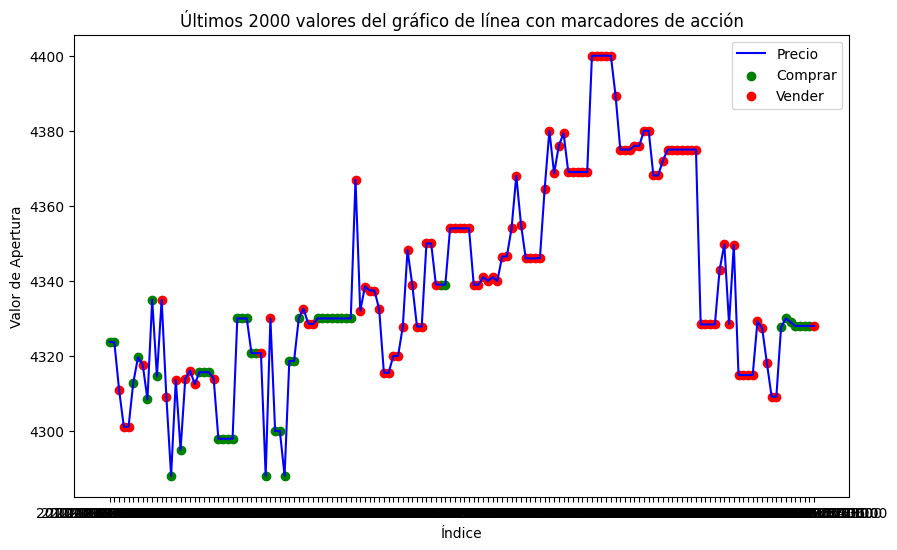

In [ ]:
# Seleccionar los últimos 2000 valores de las columnas 'Open' y 'Action'
df_eval_tail = df_eval.tail(150)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la línea de la columna 'Open'
plt.plot(df_eval_tail['Close0'], color='blue', label='Precio')

# Marcar puntos verdes donde 'Action' es igual a 1
plt.scatter(df_eval_tail.index[df_eval_tail['Action'] == 1], df_eval_tail['Close0'][df_eval_tail['Action'] == 1], color='green', label='Comprar')

# Marcar puntos rojos donde 'Action' es igual a -1
plt.scatter(df_eval_tail.index[df_eval_tail['Action'] == 0], df_eval_tail['Close0'][df_eval_tail['Action'] == 0], color='red', label='Vender')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor de Apertura')
plt.title('Últimos 2000 valores del gráfico de línea con marcadores de acción')
plt.legend()

# Mostrar el gráfico
plt.grid(False)
plt.show()

### Red Neuronal

In [ ]:
def matthews_correlation(y_true, y_pred):

    y_pred_pos = tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = tf.keras.backend.sum(y_pos * y_pred_pos)
    tn = tf.keras.backend.sum(y_neg * y_pred_neg)

    fp = tf.keras.backend.sum(y_neg * y_pred_pos)
    fn = tf.keras.backend.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = tf.keras.backend.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + tf.keras.backend.epsilon())

In [ ]:
# Inicializar el modelo Sequential
model = Sequential()

# Añadir capas densas
model.add(Dense(50, input_dim=71, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='softmax'))  # 3 clases de salida: 1, 0, -1

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='f1_score')

In [ ]:
for i in range(1):
  normalizar(df,i)

  labels = df_normal.drop(['NCV','Open-1','High-1','Low-1','Close-1','Volume-1','Action'],axis=1).columns
  X = df_normal[labels]
  #X = df_normal[labels].to_numpy()
  y = df_normal['Action']



  X_train = X[:int(len(X)*0.8)]
  X_test  = X[int(len(X)*0.8):]
  y_train = y[:int(len(y)*0.8)]
  y_test  = y[int(len(y)*0.8):]

  # Entrenar el modelo
  model.fit(X_train, y_train, epochs=50, batch_size=12, validation_data=(X_test, y_test))

df_final y df_normal generados
Epoch 1/50


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Precisión del modelo (accuracy):", accuracy)

9/9 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6840
Precisión del modelo (accuracy): 0.6840277910232544


In [ ]:
calculo = model.predict(X_test[241:242])

1/1 [==============================] - 0s 108ms/step


In [ ]:
real = y_test[241:242].values

In [ ]:
print('Calculo del modelo:',calculo)
print('Valores  reales:',real)

Calculo del modelo: [[1.]]
Valores  reales: [1]


In [ ]:
df_eval = df_normal.copy(deep = True)
df_eval['Action'] = model.predict(df_eval[labels])
df_eval.Action.value_counts()

45/45 [==============================] - 0s 1ms/step


Action
1.0    1440
Name: count, dtype: int64

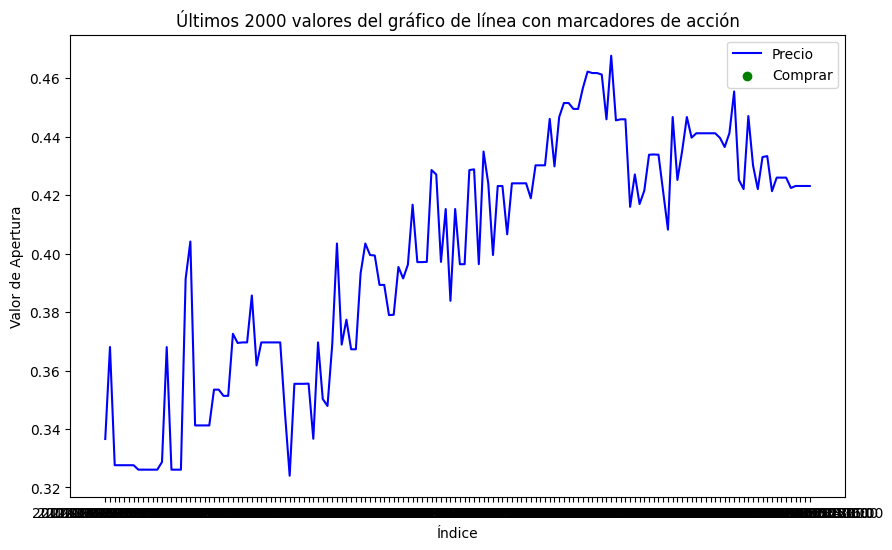

In [ ]:
# Seleccionar los últimos 2000 valores de las columnas 'Open' y 'Action'
df_eval_tail = df_eval.tail(150)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la línea de la columna 'Open'
plt.plot(df_eval_tail['Close0'], color='blue', label='Precio')

# Marcar puntos verdes donde 'Action' es igual a 1
plt.scatter(df_eval_tail.index[df_eval_tail['Action'] == 1], df_eval_tail['Close0'][df_eval_tail['Action'] == 1], color='green', label='Comprar')

# Marcar puntos rojos donde 'Action' es igual a -1
#plt.scatter(df_eval_tail.index[df_eval_tail['Vender'] == 1], df_eval_tail['Close0'][df_eval_tail['Vender'] == 1], color='red', label='Vender')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor de Apertura')
plt.title('Últimos 2000 valores del gráfico de línea con marcadores de acción')
plt.legend()

# Mostrar el gráfico
plt.grid(False)
plt.show()

### Random Forest Hypertuning

In [ ]:
def recorte(i):
  first_row = i*480
  last_row = (i+1) * 480
  df_for_train = df[first_row:last_row]

  labels = ['RSI',
            'Close13',
            'Close12',
            'Close11',
            'Close10',
            'Close9',
            'Close8',
            'Close7',
            'Close6',
            'Close5',
            'Close4',
            'Close3',
            'Close2',
            'Close1',
            'Close0',
            ]
  target = ['Action']
  X = df_for_train[labels]
  #X = df_normal[labels].to_numpy()
  y = df_for_train[target]

  global X_train
  global X_test
  global y_train
  global y_test

  X_train = X[:int(len(X)*0.8)]
  X_test  = X[int(len(X)*0.8):]
  y_train = y[:int(len(y)*0.8)]
  y_test  = y[int(len(y)*0.8):]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

recorte(0)
# Definir el modelo RandomForest
model = RandomForestClassifier()

# Definir la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(10, 100),  # Número de árboles en el bosque
    'max_depth': randint(1, 20),       # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 20),   # Número mínimo de muestras requeridas en cada hoja del árbol
    'max_features': ['auto', 'sqrt', 'log2']  # Número máximo de características a considerar para cada división
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

Mejores hiperparámetros: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 15, 'n_estimators': 85}


<ipython-input-141-0afbc5711850>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=1, min_samples_leaf=16, min_samples_split=15,
                       n_estimators=85)

In [ ]:
len(df) / 480

2027.8854166666667

In [ ]:
for i in range(50):
  try:
    recorte(i)

    labels = ['RSI',
              'Close13',
              'Close12',
              'Close11',
              'Close10',
              'Close9',
              'Close8',
              'Close7',
              'Close6',
              'Close5',
              'Close4',
              'Close3',
              'Close2',
              'Close1',
              'Close0',]

    target = ['Action']
    X = df_normal[labels]
    #X = df_normal[labels].to_numpy()
    y = df_normal[target]



    X_train = X[:int(len(X)*0.8)]
    X_test  = X[int(len(X)*0.8):]
    y_train = y[:int(len(y)*0.8)]
    y_test  = y[int(len(y)*0.8):]

    # Entrenar el modelo
    best_model.fit(X_train, y_train)
  except:
    continue

<ipython-input-134-e736656c138d>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)
<ipython-input-134-e736656c138d>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)
<ipython-input-134-e736656c138d>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)
<ipython-input-134-e736656c138d>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)
<ipython-input-134-e736656c138d>:34: DataConversionWarning: A column-vector y was passed whe

In [ ]:
# Calcular la precisión del modelo
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo Random Forest: 0.75

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.75      1.00      0.86        72

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_eval = df_normal.copy(deep = True)
df_eval['Action'] = best_model.predict(df_eval[labels])
df_eval.Action.value_counts()

Action
1    1440
Name: count, dtype: int64

Exception ignored in: <function _xla_gc_callback at 0x79b2e6b90ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


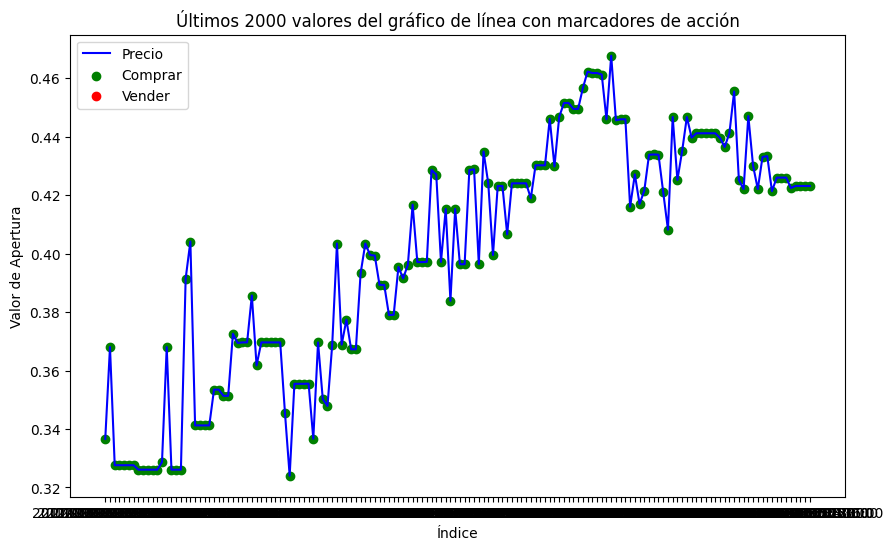

In [ ]:
# Seleccionar los últimos 2000 valores de las columnas 'Open' y 'Action'
df_eval_tail = df_eval.tail(150)

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la línea de la columna 'Open'
plt.plot(df_eval_tail['Close0'], color='blue', label='Precio')

# Marcar puntos verdes donde 'Action' es igual a 1
plt.scatter(df_eval_tail.index[df_eval_tail['Action'] == 1], df_eval_tail['Close0'][df_eval_tail['Action'] == 1], color='green', label='Comprar')

# Marcar puntos rojos donde 'Action' es igual a -1
plt.scatter(df_eval_tail.index[df_eval_tail['Action'] == 0], df_eval_tail['Close0'][df_eval_tail['Action'] == 0], color='red', label='Vender')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor de Apertura')
plt.title('Últimos 2000 valores del gráfico de línea con marcadores de acción')
plt.legend()

# Mostrar el gráfico
plt.grid(False)
plt.show()

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',